In [1]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from xml.etree import ElementTree
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')

%matplotlib inline
pd.set_option('display.max_colwidth', 300)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ghata\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
def getDataFrame(filename):
  dataset=[]
  tree = ElementTree.parse(filename)
  root = tree.getroot()

  for book in root.findall('book'):
      for metadata in book.find('metadata'):
          x=metadata
          break
      a=[]
      if(x.find('d3')!=None):
          a.append(x.find('d3').text)
      if(x.find('d2')!=None):
          a.append(x.find('d2').text)
      if(x.find('d1')!=None):
          a.append(x.find('d1').text)
      if(x.find('d0')!=None):
          a.append(x.find('d0').text)

      if len(a) != 0:        
        dataset.append([book.find('title').text,a,book.find('body').text])
  return dataset  
  
  
dataset = getDataFrame('./train.xml')
dataset2 = getDataFrame('./test.xml')
dataset = dataset + dataset2
'''
import csv
with open('book_data.csv', 'r', encoding='utf8') as f:
  reader = csv.reader(f)
  for row in reader:
    genres = row[10].split('|')
    if len(genres) != 0:
      dataset.append([row[9], genres, row[1]])

import csv
dataset = []
with open('booksummaries.txt', 'r', encoding="utf8", errors='ignore') as f:
    reader=csv.reader(f,dialect='excel-tab')
    for row in reader:
      if row[5] != '':
        genres = list(json.loads(row[5]).values())
        dataset.append([row[2], genres, row[6]])
'''

'\nimport csv\nwith open(\'book_data.csv\', \'r\', encoding=\'utf8\') as f:\n  reader = csv.reader(f)\n  for row in reader:\n    genres = row[10].split(\'|\')\n    if len(genres) != 0:\n      dataset.append([row[9], genres, row[1]])\n\nimport csv\ndataset = []\nwith open(\'booksummaries.txt\', \'r\', encoding="utf8", errors=\'ignore\') as f:\n    reader=csv.reader(f,dialect=\'excel-tab\')\n    for row in reader:\n      if row[5] != \'\':\n        genres = list(json.loads(row[5]).values())\n        dataset.append([row[2], genres, row[6]])\n'

In [4]:
df=pd.DataFrame(dataset,columns=['Name','Genres','Summary'])

In [5]:
#df = df.drop_duplicates('Name', keep='first')
df

,Name,Genres,Summary
0,"The New York Times Daily Crossword Puzzles: Thursday, Volume 1","[Games, Nonfiction]","Monday’s Crosswords Do with EaseTuesday’s Crosswords Not a BreezeWednesday’s Crosswords Harder StillThursday’s Crosswords Take Real SkillFriday’s Crosswords — You’ve Come This Far…Saturday’s Crosswords — You’re a Star!For millions of people, the New York Times crossword puzzles are as essential ..."
1,Creatures of the Night (Second Edition),"[Graphic Novels and Manga, Fiction]","Two of literary comics modern masters present a pair of magical and disturbing stories of strange creatures who are not quite what they seem! In The Price, a mysterious feline engages in a nightly conflict with an unseen, vicious foe. The Daughter of Owls recounts an eerie tale of a beautiful or..."
2,Cornelia and the Audacious Escapades of the Somerset Sisters,"[Children’s Middle Grade Books, Children’s Books]","Eleven-year-old Cornelia is the daughter of two world-famous pianists—a legacy that should feel fabulous, but instead feels just plain lonely. She surrounds herself with dictionaries and other books to isolate herself from the outside world. But when a glamorous neighbor named Virginia Somerset ..."
3,The Alchemist's Daughter,"[Historical Fiction, Fiction]","During the English Age of Reason, a woman cloistered since birth learns that knowledge is no substitute for experience.Raised by her father in near isolation in the English countryside, Emilie Selden is trained as a brilliant natural philosopher and alchemist. In the spring of 1725, father and d..."
4,Dangerous Boy,"[Teen and Young Adult Mystery and Suspense, Teen and Young Adult]","A modern-day retelling of The Strange Case of Dr. Jekyll and Mr. Hyde with a chilling twist Harper has never been worried about falling in love, something she is skeptical even exists. But everything changes when Logan moves to town, and to Harper’s shock, the two tumble into an intense romance...."
...,...,...,...
77104,Cathedral of the Sea,"[Romance, Fiction]","An unforgettable fresco of a golden age in fourteenth-century Barcelona, Cathedral of the Sea is a thrilling historical novel of friendship and revenge, plague and hope, love and war. Arnau Estanyol arrives in Barcelona to find a city dominated by the construction of the city’s great pride—the..."
77105,Understanding the Messages of Your Body,"[Alternative Therapies, Health and Fitness, Nonfiction]","Fears, anxieties, traumas, and physical and emotional shocks imprint on the body and remain dormant in its vast memory store until they are roused by an event or encounter. They may manifest in a different form or place—a fearful incident may transform itself into a stomachache or a headache, or..."
77106,Knockout,"[Alternative Therapies, Health and Fitness, Nonfiction]","In Knockout, Suzanne Somers interviews doctors who are successfully using the most innovative cancer treatments—treatments that build up the body rather than tear it down. Somers herself has stared cancer in the face, and a decade later she has conquered her fear and has emerged confident with t..."
77107,The End of the Suburbs,"[Domestic Politics, Politics, Nonfiction]","“The government in the past created one American Dream at the expense of almost all others: the dream of a house, a lawn, a picket fence, two children, and a car. But there is no single American Dream anymore.”For nearly 70 years, the suburbs were as American as apple pie. As the middle class ba..."


In [0]:
import random
from random import shuffle

def synonym_replacement(words, n):
	new_words = words.copy()
	random_word_list = list(set([word for word in words if word not in stop_words]))
	random.shuffle(random_word_list)
	num_replaced = 0
	for random_word in random_word_list:
		synonyms = get_synonyms(random_word)
		if len(synonyms) >= 1:
			synonym = random.choice(list(synonyms))
			new_words = [synonym if word == random_word else word for word in new_words]
			#print("replaced", random_word, "with", synonym)
			num_replaced += 1
		if num_replaced >= n: #only replace up to n words
			break

	#this is stupid but we need it, trust me
	sentence = ' '.join(new_words)
	new_words = sentence.split(' ')

	return new_words

def get_synonyms(word):
	synonyms = set()
	for syn in wordnet.synsets(word): 
		for l in syn.lemmas(): 
			synonym = l.name().replace("_", " ").replace("-", " ").lower()
			synonym = "".join([char for char in synonym if char in ' qwertyuiopasdfghjklzxcvbnm'])
			synonyms.add(synonym) 
	if word in synonyms:
		synonyms.remove(word)
	return list(synonyms)

In [0]:
def applysynonym(row):
    words = nltk.word_tokenize(row)
    n = len(words)
    res = synonym_replacement(words,n//10)
    return ' '.join(res)

def augmentdata(n):
    global df
    temp = []
    for index,row in df.iterrows():
      if 'Fiction' not in row['Genres'] and 'Speculative Fiction' not in row['Genres']:
        temp.append(row)
    temp = pd.DataFrame(temp,columns=['Name','Genres','Summary'])
    t1 = temp
    for i in range(n):
      t1.Summary = temp.Summary.apply(applysynonym)
      df = df.append(t1,ignore_index=True)
    return

augmentdata(10)

NameError: ignored

In [6]:
all_genres = sum(df["Genres"],[])
print("Total unique genres:", len(set(all_genres)))

Total unique genres: 139


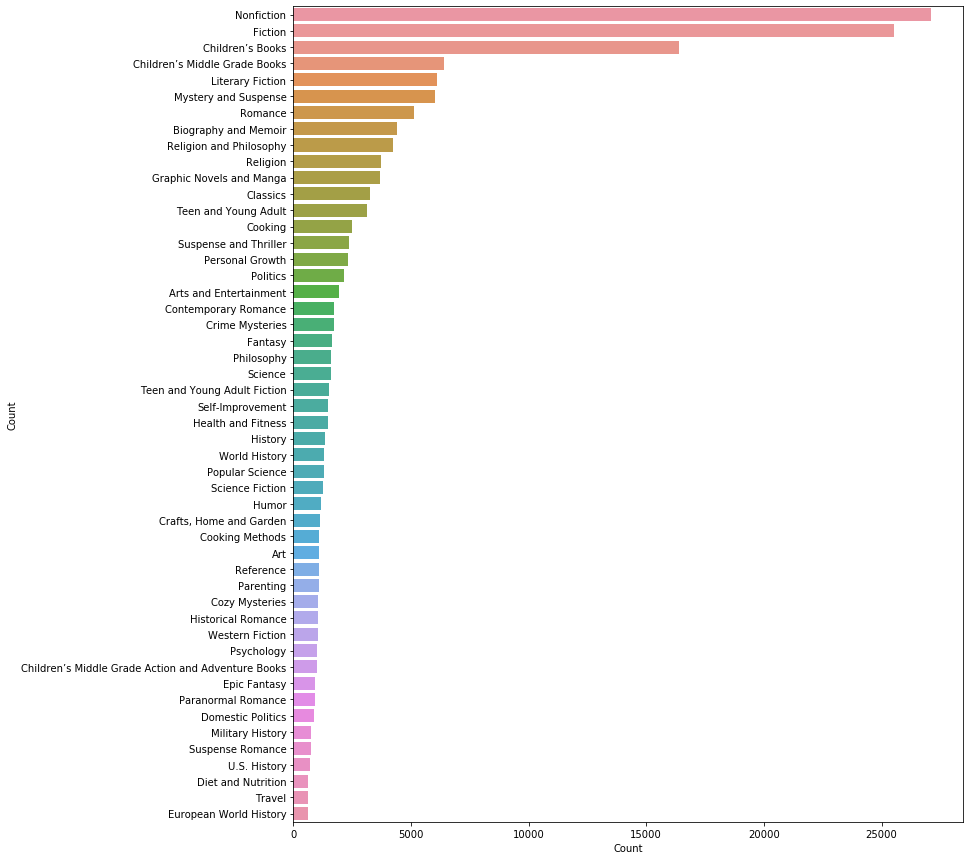

In [7]:
all_genres = nltk.FreqDist(all_genres) 
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count') 
plt.show()

In [8]:
def clean_text(text):
    text = re.sub("\'", "", text) 
    text = re.sub("[^a-zA-Z]"," ",text) 
    text = ' '.join(text.split()) 
    text = text.lower() 
    return text

In [9]:
df['Summary'] = df['Summary'].apply(lambda x: clean_text(x))

In [11]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

df['Summary'] = df['Summary'].apply(lambda x: remove_stopwords(x))

In [10]:
df.head()

,Name,Genres,Summary
0,"The New York Times Daily Crossword Puzzles: Thursday, Volume 1","[Games, Nonfiction]",monday s crosswords do with easetuesday s crosswords not a breezewednesday s crosswords harder stillthursday s crosswords take real skillfriday s crosswords you ve come this far saturday s crosswords you re a star for millions of people the new york times crossword puzzles are as essential to ea...
1,Creatures of the Night (Second Edition),"[Graphic Novels and Manga, Fiction]",two of literary comics modern masters present a pair of magical and disturbing stories of strange creatures who are not quite what they seem in the price a mysterious feline engages in a nightly conflict with an unseen vicious foe the daughter of owls recounts an eerie tale of a beautiful orphan...
2,Cornelia and the Audacious Escapades of the Somerset Sisters,"[Children’s Middle Grade Books, Children’s Books]",eleven year old cornelia is the daughter of two world famous pianists a legacy that should feel fabulous but instead feels just plain lonely she surrounds herself with dictionaries and other books to isolate herself from the outside world but when a glamorous neighbor named virginia somerset mov...
3,The Alchemist's Daughter,"[Historical Fiction, Fiction]",during the english age of reason a woman cloistered since birth learns that knowledge is no substitute for experience raised by her father in near isolation in the english countryside emilie selden is trained as a brilliant natural philosopher and alchemist in the spring of father and daughter e...
4,Dangerous Boy,"[Teen and Young Adult Mystery and Suspense, Teen and Young Adult]",a modern day retelling of the strange case of dr jekyll and mr hyde with a chilling twist harper has never been worried about falling in love something she is skeptical even exists but everything changes when logan moves to town and to harper s shock the two tumble into an intense romance it s e...


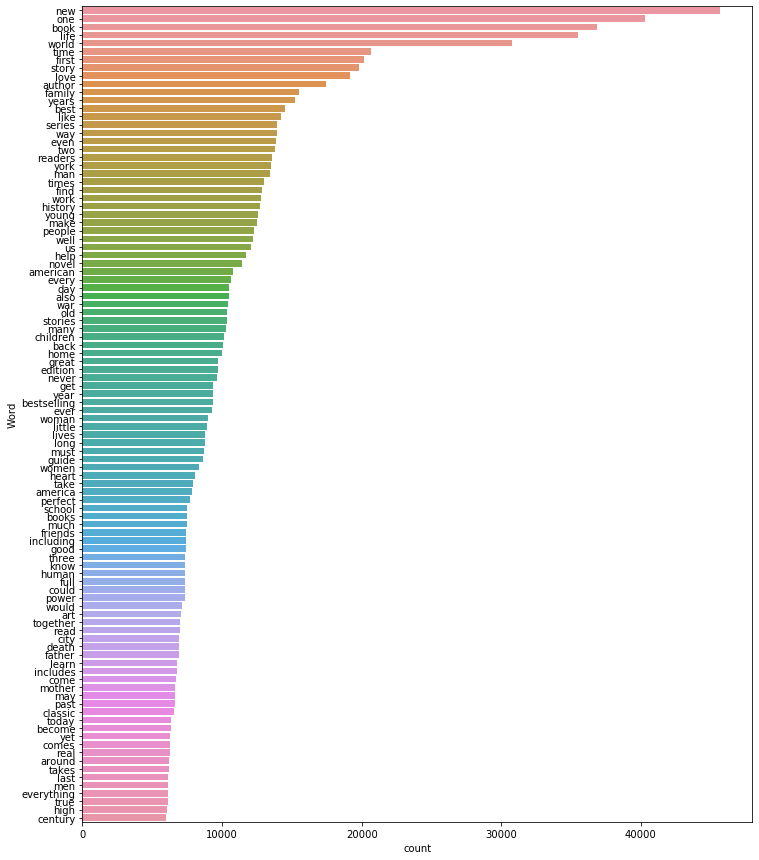

In [12]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
freq_words(df['Summary'], 100)

In [13]:
from sklearn.preprocessing import MultiLabelBinarizer
#from sklearn import preprocessing

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(df['Genres'])

# transform target variable
y = multilabel_binarizer.transform(df['Genres'])

In [14]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)
xtrain, xval, ytrain, yval = train_test_split(df['Summary'], y, test_size=0.2, random_state=9)
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [15]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

In [16]:
import math
lr = LogisticRegression(max_iter=math.inf)
clf = OneVsRestClassifier(lr)

In [17]:
clf.fit(xtrain_tfidf, ytrain)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=inf,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [18]:
y_pred = clf.predict(xval_tfidf)

In [0]:
f1_score(yval, y_pred, average="micro")
#clf.score(yval, y_pred)

0.653849851004518

In [19]:
y_pred_prob = clf.predict_proba(xval_tfidf)
t = 0.2505 # threshold value 0.2505 -> 0.712340852740299
y_pred_new = (y_pred_prob >= t).astype(int)

In [0]:
f1_score(yval, y_pred_new, average="micro")

0.7768644269716465

In [28]:
def infer_tags(q):
    q = clean_text(q)
    q = remove_stopwords(q)
    q_vec = tfidf_vectorizer.transform([q])
    #q_pred = clf.predict(q_vec)

    q_pred_prob = clf.predict_proba(q_vec)
    t = 0.2505 # threshold value 0.2505 -> 0.7110468896756014
    q_pred_new = (q_pred_prob >= t).astype(int)

    return multilabel_binarizer.inverse_transform(q_pred_new)

In [29]:
for i in range(5): 
  k = xval.sample(1).index[0] 
  print("Book: ", df['Name'][k], "\nPredicted genre: ", infer_tags(xval[k])), print("Actual genre: ",df['Genres'][k], "\n")

Book:  More Letters from a Nut 
Predicted genre:  [('Biography and Memoir', 'Children’s Books', 'Nonfiction')]
Actual genre:  ['Literary Collections', 'Classics'] 

Book:  Going Home 
Predicted genre:  [('Children’s Books', 'Children’s Middle Grade Books', 'Teen and Young Adult', 'Teen and Young Adult Fiction')]
Actual genre:  ['Children’s Middle Grade Books', 'Children’s Books'] 

Book:  Departures 
Predicted genre:  [('Children’s Books', 'Teen and Young Adult', 'Teen and Young Adult Fiction')]
Actual genre:  ['Teen and Young Adult Fiction', 'Teen and Young Adult'] 

Book:  Longarm #391 
Predicted genre:  [('Fiction', 'Western Fiction')]
Actual genre:  ['Western Fiction', 'Fiction'] 

Book:  Fool Moon 
Predicted genre:  [('Fiction',)]
Actual genre:  ['Urban Fantasy', 'Paranormal Fiction', 'Fiction'] 



In [22]:
import pickle
with open('tf.pickle', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

In [23]:
import pickle
with open('multi.pickle', 'wb') as f:
    pickle.dump(multilabel_binarizer, f)

In [24]:
import pickle
with open('onevrest.pickle', 'wb') as f:
    pickle.dump(clf, f)

In [25]:
with open('tf.pickle', 'rb') as f:
     tfidf_vectorizer = pickle.load(f)
tfidf_vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.8, max_features=10000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [26]:
with open('multi.pickle', 'rb') as f:
     multilabel_binarizer = pickle.load(f)
multilabel_binarizer

MultiLabelBinarizer(classes=None, sparse_output=False)

In [27]:
with open('onevrest.pickle', 'rb') as f:
     clf = pickle.load(f)
clf

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=inf,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)